**Aim: The ultimate goal of the project is to build a machine learning model that could find the futuristic humidity level(3pm) in air with the measure at present time(9 pm) and calculate the accuracy**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import scipy.stats as stats

In [57]:
data=pd.read_csv("weather.csv")

In [59]:
data.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,Unnamed: 11,category_encoded,classified
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,NaN,628,1
1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,19.426597,NaN,362,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000,NaN,158,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547,NaN,90,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000,NaN,978,1


In [60]:
data.tail()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,Unnamed: 11,category_encoded,classified
1090,918.90,63.104,192.9,3.869906,207.3,5.212070,0.0,0.0,26.02,38.18,NaN,647,1
1091,918.71,49.568,241.6,1.811921,227.4,2.371156,0.0,0.0,90.35,73.34,NaN,965,1
1092,916.60,71.096,189.3,3.064608,200.8,3.892276,0.0,0.0,45.59,52.31,NaN,794,1
1093,912.60,58.406,172.7,3.825167,189.1,4.764682,0.0,0.0,64.84,58.28,NaN,867,1
1094,921.53,77.702,97.1,3.265932,125.9,4.451511,0.0,0.0,14.56,15.10,NaN,180,0


In [62]:
data.shape

(1095, 13)

In [65]:
data.nunique()

air_pressure_9am           852
air_temp_9am               980
avg_wind_direction_9am     942
avg_wind_speed_9am         723
max_wind_direction_9am     943
max_wind_speed_9am         738
rain_accumulation_9am       82
rain_duration_9am          142
relative_humidity_9am     1052
relative_humidity_3pm     1054
Unnamed: 11                  0
category_encoded          1054
classified                   2
dtype: int64

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   air_pressure_9am        1092 non-null   float64
 1   air_temp_9am            1090 non-null   float64
 2   avg_wind_direction_9am  1091 non-null   float64
 3   avg_wind_speed_9am      1092 non-null   float64
 4   max_wind_direction_9am  1092 non-null   float64
 5   max_wind_speed_9am      1091 non-null   float64
 6   rain_accumulation_9am   1089 non-null   float64
 7   rain_duration_9am       1092 non-null   float64
 8   relative_humidity_9am   1095 non-null   float64
 9   relative_humidity_3pm   1095 non-null   float64
 10  Unnamed: 11             0 non-null      float64
 11  category_encoded        1095 non-null   int64  
 12  classified              1095 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 111.3 KB


**Checking The data for its values,measures of central tendency and dispersion**

In [658]:
data.describe()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,Unnamed: 11
count,1095.000000,1092.000000,1090.000000,1091.000000,1092.000000,1092.000000,1091.000000,1089.000000,1092.000000,1095.000000,1095.000000,0.0
mean,547.000000,918.882551,64.933001,142.235511,5.508284,148.953518,7.019514,0.203079,294.108052,34.241402,35.344727,NaN
std,316.243577,3.184161,11.175514,69.137859,4.552813,67.238013,5.598209,1.593952,1598.078779,25.472067,22.524079,NaN
min,0.000000,907.990000,36.752000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,6.090000,5.300000,NaN
25%,273.500000,916.550000,57.281000,65.972506,2.248768,76.553003,3.067477,0.000000,0.000000,15.092243,17.395000,NaN
50%,547.000000,918.921045,65.715479,166.000000,3.871333,177.300000,4.943637,0.000000,0.000000,23.179259,24.380000,NaN
75%,820.500000,921.160073,73.450974,191.000000,7.337163,201.233153,8.947760,0.000000,0.000000,45.400000,52.060000,NaN
max,1094.000000,929.320000,98.906000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,92.620000,92.250000,NaN


In [71]:
mean = data['relative_humidity_3pm'].mean()
median = data['relative_humidity_3pm'].median()
mode = statistics.mode(data['relative_humidity_3pm'])
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)

Mean: 35.3447271482347
Median: 24.38
Mode: 56.93


In [73]:
range = data['air_pressure_9am'].max() - data['air_pressure_9am'].min()
variance = data['air_pressure_9am'].var()
std_deviation = data['air_pressure_9am'].std()
print("Range:", range)
print("Variance:", variance)
print("Standard Deviation:", std_deviation)

Range: 21.33000000000004
Variance: 10.13888242928001
Standard Deviation: 3.1841611814228266


In [75]:
range = data['air_pressure_9am'].max() - data['air_pressure_9am'].min()
variance = data['air_pressure_9am'].var()
std_deviation = data['air_pressure_9am'].std()
print("Range:", range)
print("Variance:", variance)
print("Standard Deviation:", std_deviation)

Range: 21.33000000000004
Variance: 10.13888242928001
Standard Deviation: 3.1841611814228266


**Performing data preprocessing**

In [81]:
before_rows=data.shape[0]
print(before_rows)

1095


In [83]:
data=data.dropna()

In [85]:
data =pd.read_csv("daily_weather.csv")
df = pd.DataFrame(data)
df_filled = df.fillna(value=0)
print(df_filled)

      number  air_pressure_9am  air_temp_9am  avg_wind_direction_9am  \
0          0        918.060000     74.822000              271.100000   
1          1        917.347688     71.403843              101.935179   
2          2        923.040000     60.638000               51.000000   
3          3        920.502751     70.138895              198.832133   
4          4        921.160000     44.294000              277.800000   
...      ...               ...           ...                     ...   
1090    1090        918.900000     63.104000              192.900000   
1091    1091        918.710000     49.568000              241.600000   
1092    1092        916.600000     71.096000              189.300000   
1093    1093        912.600000     58.406000              172.700000   
1094    1094        921.530000     77.702000               97.100000   

      avg_wind_speed_9am  max_wind_direction_9am  max_wind_speed_9am  \
0               2.080354              295.400000            2.8

In [87]:
clean_data=data.copy()
clean_data['high_humidity_label']=(clean_data['relative_humidity_3pm']>24.99)*1
clean_data['high_humidity_label'].head()

0    1
1    0
2    0
3    0
4    1
Name: high_humidity_label, dtype: int32

In [89]:
y=clean_data[['high_humidity_label']].copy()
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


In [91]:
clean_data['relative_humidity_3pm'].head()

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

In [93]:
y.head()

,high_humidity_label
0,1
1,0
2,0
3,0
4,1


**Outlier analysis**

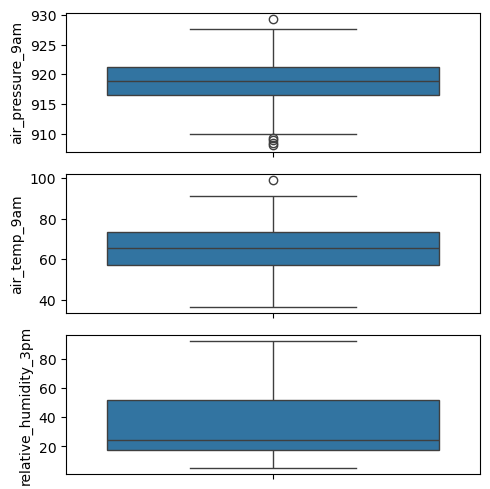

In [627]:
import seaborn as sns
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['air_pressure_9am'], ax = axs[0])
plt2 = sns.boxplot(df['air_temp_9am'], ax = axs[1])
plt3 = sns.boxplot(df['relative_humidity_3pm'], ax = axs[2])
plt.tight_layout()

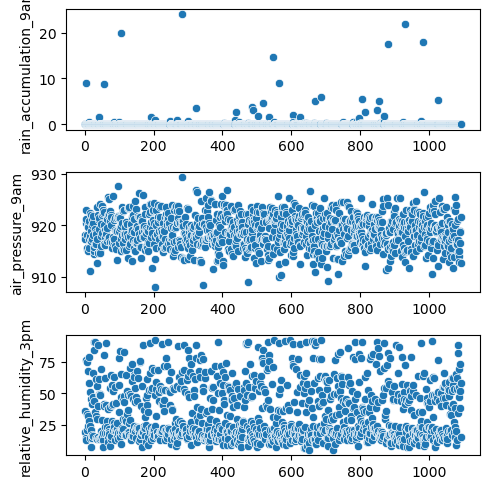

In [629]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.scatterplot(df['rain_accumulation_9am'], ax = axs[0])
plt2 = sns.scatterplot(df['air_pressure_9am'], ax = axs[1])
plt3 = sns.scatterplot(df['relative_humidity_3pm'], ax = axs[2])
plt.tight_layout()


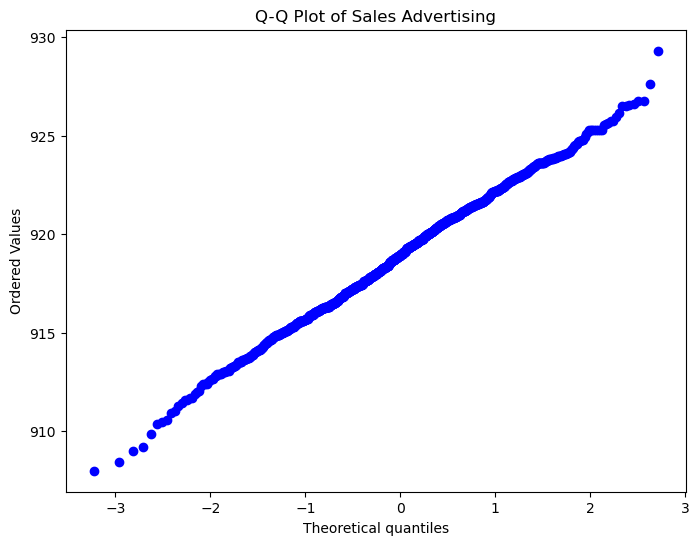

In [639]:
plt.figure(figsize=(8, 6))
stats.probplot(df['air_pressure_9am'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Sales Advertising')
plt.show()

**Univariate Analysis**

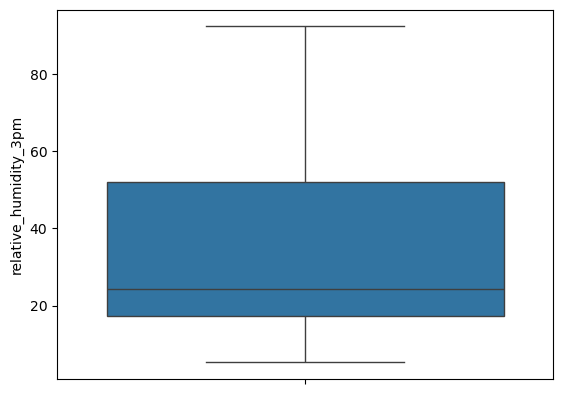

In [641]:
sns.boxplot(df['relative_humidity_3pm'])
plt.show()

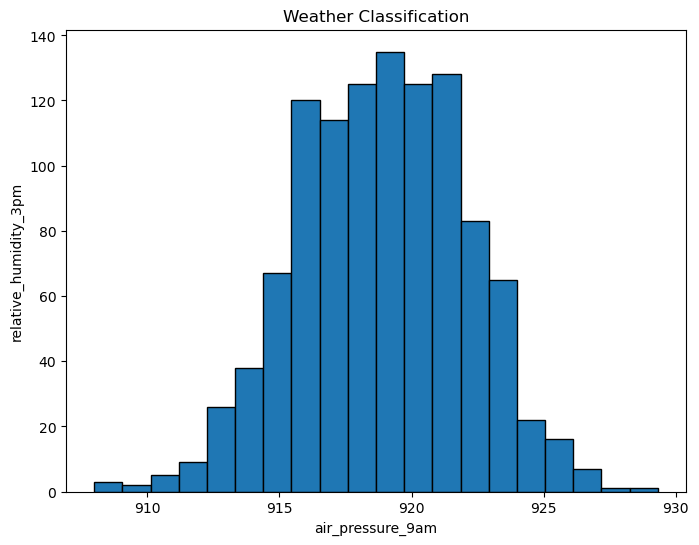

In [643]:
plt.figure(figsize=(8, 6))
plt.hist(df['air_pressure_9am'], bins=20, edgecolor='black')
plt.title('Weather Classification')
plt.xlabel('air_pressure_9am')
plt.ylabel('relative_humidity_3pm')
plt.show()


**Bivariate Analysis**

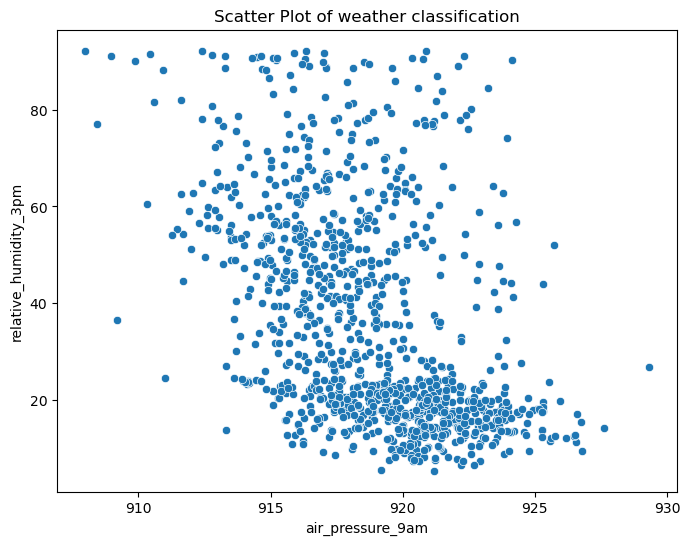

In [647]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='air_pressure_9am', y='relative_humidity_3pm', data=df)
plt.title('Scatter Plot of weather classification')
plt.xlabel('air_pressure_9am')
plt.ylabel('relative_humidity_3pm')
plt.show()


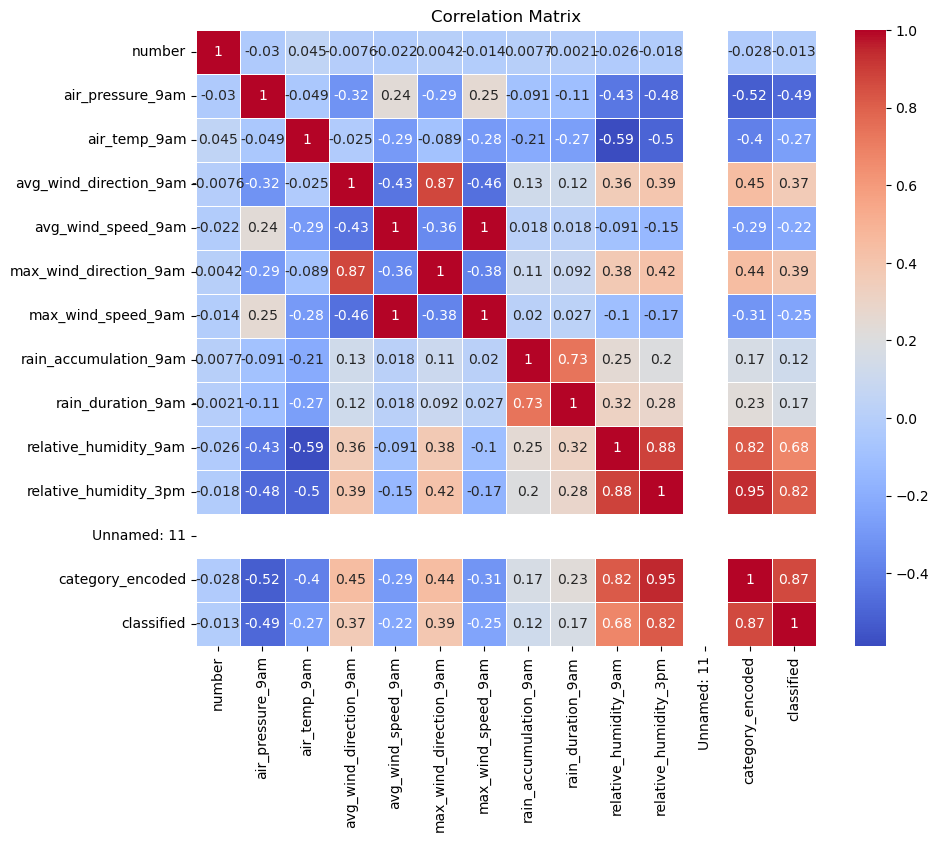

In [649]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Multi Varaite Analysis**

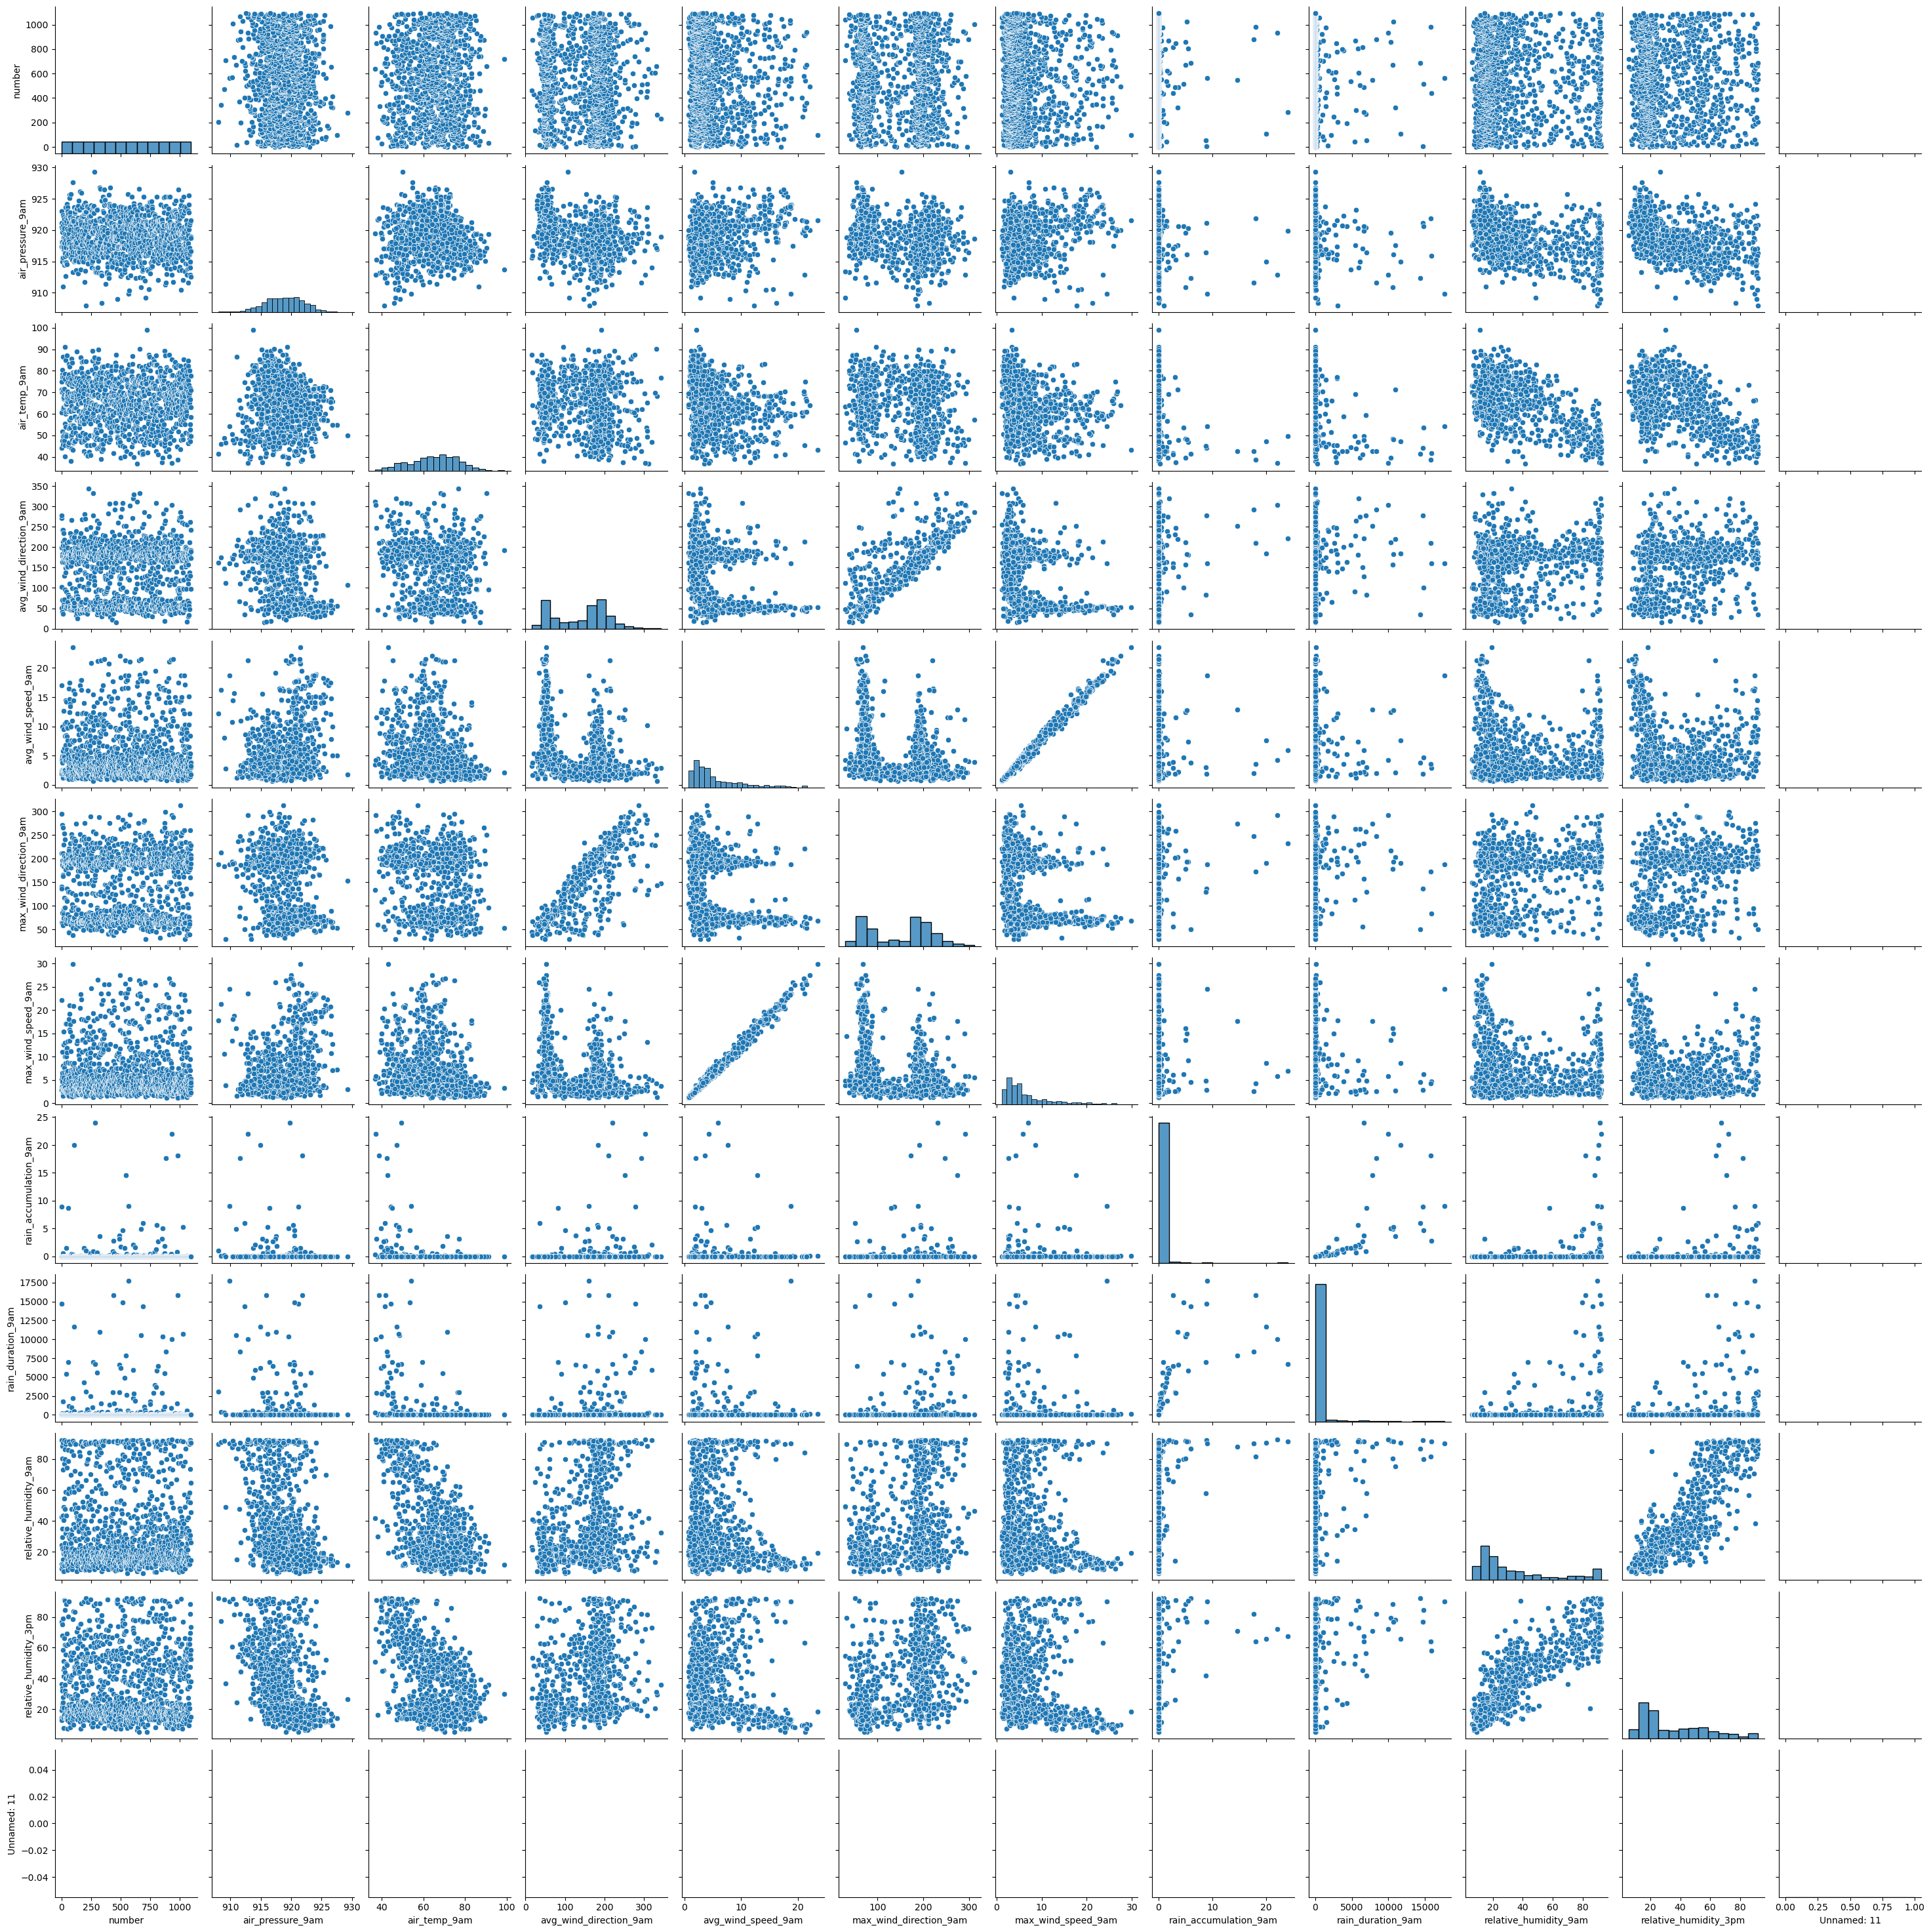

In [652]:
sns.pairplot(data)
plt.show()

**Checking For Outliers**

In [653]:
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
print(np.where(z_scores > 3)) 


(array([], dtype=int64), array([], dtype=int64))


**Label Encoding and One hot Encoding**

In [95]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler



In [97]:
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['relative_humidity_3pm'])
print(df[['relative_humidity_3pm', 'category_encoded']].head())


   relative_humidity_3pm  category_encoded
0              36.160000               628
1              19.426597               362
2              14.460000               158
3              12.742547                90
4              76.740000               978


In [99]:
import pandas as pd
df_one_hot = pd.get_dummies(df)  
print(df_one_hot.head())


   number  air_pressure_9am  air_temp_9am  avg_wind_direction_9am  \
0       0        918.060000     74.822000              271.100000   
1       1        917.347688     71.403843              101.935179   
2       2        923.040000     60.638000               51.000000   
3       3        920.502751     70.138895              198.832133   
4       4        921.160000     44.294000              277.800000   

   avg_wind_speed_9am  max_wind_direction_9am  max_wind_speed_9am  \
0            2.080354              295.400000            2.863283   
1            2.443009              140.471549            3.533324   
2           17.067852               63.700000           22.100967   
3            4.337363              211.203341            5.190045   
4            1.856660              136.500000            2.863283   

   rain_accumulation_9am  rain_duration_9am  relative_humidity_9am  \
0                    0.0                0.0              42.420000   
1                    0.0      

**Classifying the values in the final column(y)(I.e. relative humidity at 3pm to be 
‘0’ if the value is below 25 and ‘ 1’ if it is above 2**5)

In [101]:
df['classified'] = df['relative_humidity_3pm'].apply(lambda x: 1 if x > 25 else 0)
df.to_csv('weather.csv', index=False)
print(df.head())

   number  air_pressure_9am  air_temp_9am  avg_wind_direction_9am  \
0       0        918.060000     74.822000              271.100000   
1       1        917.347688     71.403843              101.935179   
2       2        923.040000     60.638000               51.000000   
3       3        920.502751     70.138895              198.832133   
4       4        921.160000     44.294000              277.800000   

   avg_wind_speed_9am  max_wind_direction_9am  max_wind_speed_9am  \
0            2.080354              295.400000            2.863283   
1            2.443009              140.471549            3.533324   
2           17.067852               63.700000           22.100967   
3            4.337363              211.203341            5.190045   
4            1.856660              136.500000            2.863283   

   rain_accumulation_9am  rain_duration_9am  relative_humidity_9am  \
0                    0.0                0.0              42.420000   
1                    0.0      

In [103]:
morning_features=['air_pressure_9am','air_temp_9am','avg_wind_direction_9am','avg_wind_speed_9am','max_wind_direction_9am','max_wind_speed_9am','rain_accumulation_9am',
        'rain_duration_9am','rain_duration_9am','relative_humidity_9am']

In [105]:
x=clean_data[morning_features].copy()
x.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'rain_duration_9am',
       'relative_humidity_9am'],
      dtype='object')

In [107]:
y.columns

Index(['high_humidity_label'], dtype='object')

**splitting the data into X and Y to make it ready for training purposes**

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [594]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [596]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Train the data with a Decision Tree Model with appropriate train test split** 


In [598]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state =42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [600]:
type(classifier)

sklearn.tree._classes.DecisionTreeClassifier

**Test the data by giving X-test as a parameter**

In [602]:
y_predicted=classifier.predict(X_test)

In [604]:
y_predicted[:5]

array([1, 0, 0, 0, 0])

In [606]:
y_test['high_humidity_label'][:5]

533    1
139    0
88     0
841    0
985    0
Name: high_humidity_label, dtype: int32

[Text(0.5659722222222222, 0.96875, 'x[9] <= -0.316\nentropy = 1.0\nsamples = 766\nvalue = [381, 385]'),
 Text(0.2962962962962963, 0.90625, 'x[0] <= -0.006\nentropy = 0.653\nsamples = 423\nvalue = [352, 71]'),
 Text(0.14814814814814814, 0.84375, 'x[9] <= -0.531\nentropy = 0.98\nsamples = 132\nvalue = [77, 55]'),
 Text(0.07407407407407407, 0.78125, 'x[5] <= -0.904\nentropy = 0.895\nsamples = 93\nvalue = [64, 29]'),
 Text(0.05555555555555555, 0.71875, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.09259259259259259, 0.71875, 'x[4] <= 0.708\nentropy = 0.952\nsamples = 78\nvalue = [49, 29]'),
 Text(0.05555555555555555, 0.65625, 'x[4] <= -1.543\nentropy = 0.854\nsamples = 61\nvalue = [44, 17]'),
 Text(0.037037037037037035, 0.59375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.07407407407407407, 0.59375, 'x[1] <= 2.105\nentropy = 0.818\nsamples = 59\nvalue = [44, 15]'),
 Text(0.05555555555555555, 0.53125, 'x[1] <= 1.816\nentropy = 0.775\nsamples = 57\nvalue = [44, 13]'),
 

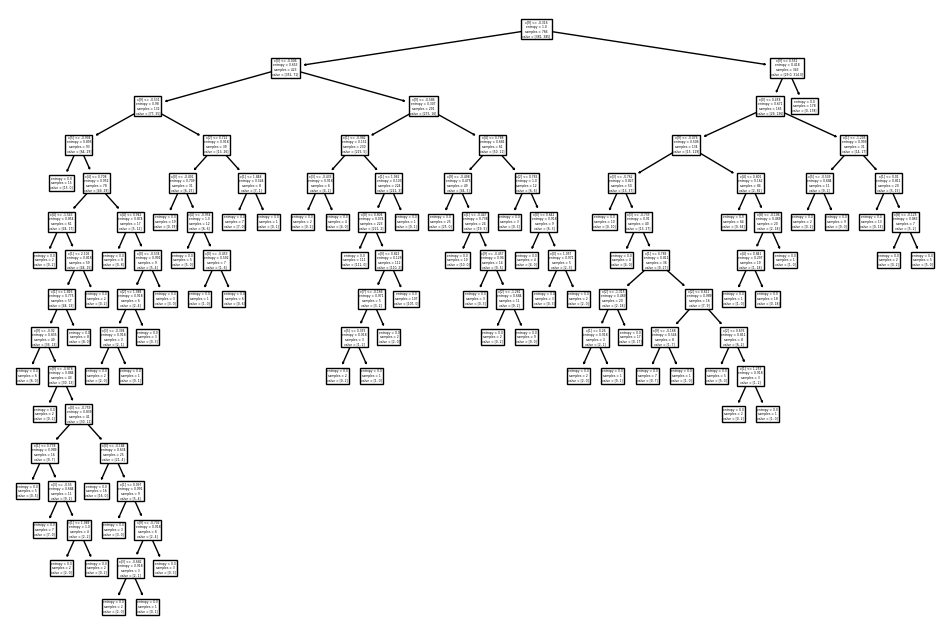

In [616]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(classifier.fit(X_train, y_train)) 

**Confusion Matrix and calculate accuracy**

In [617]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predicted)
print(cm)
accuracy_score(y_test, y_predicted)

[[150  17]
 [ 19 143]]


0.8905775075987842

**calculating the accuracy score of the  model**

In [674]:
accuracy_score(y_test,y_predicted)*100

89.05775075987842

In [619]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       167
           1       0.89      0.88      0.89       162

    accuracy                           0.89       329
   macro avg       0.89      0.89      0.89       329
weighted avg       0.89      0.89      0.89       329

